In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,7]

from datasets import *


def get_components(DecomposeResult):
    df = pd.DataFrame({
        'observed': DecomposeResult.observed,
        'resid': DecomposeResult.resid,
        'seasonal': DecomposeResult.seasonal,
        'trend': DecomposeResult.trend
    })
    return df

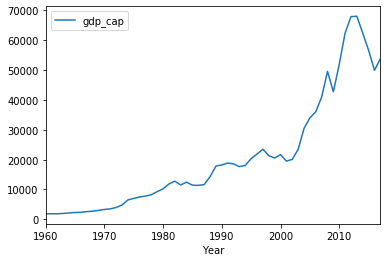

In [2]:
global_economy[global_economy.Country == 'Australia'].assign(
    gdp_cap = global_economy.GDP / global_economy.Population
).plot(x='Year', y='gdp_cap')

In [3]:
aus_retail.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Apr,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 May,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jun,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jul,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Aug,3.6


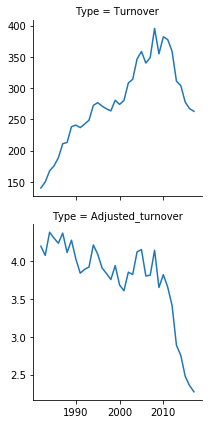

In [4]:
print_retail = aus_retail[
    aus_retail.Industry == 'Newspaper and book retailing'
][['Month', 'Turnover']].groupby(
    'Month', as_index=False
).sum(
).assign(
    Year=aus_retail.Month.str[:4].astype('int')
)

aus_economy = global_economy[global_economy.Code == 'AUS']

print_long = print_retail.merge(
    aus_economy,
    on='Year'
).assign(
    Adjusted_turnover = lambda x: x.Turnover / x.CPI
)[
    ['Year', 'Turnover', 'Adjusted_turnover']
].melt(
    id_vars='Year',
    var_name='Type',
    value_name='Turnover'
)

p = sns.FacetGrid(print_long, row='Type', sharey=False)
p.map_dataframe(sns.lineplot, x='Year', y='Turnover', ci=None)

In [5]:
from scipy.stats import boxcox, boxcox_normmax

lambda_ = boxcox_normmax(aus_production.Gas, brack=(-1.9, 2.0), method='mle')
# guerrero doesn't seem to exist in the scipy implementation

lambda_
# higher than the guerrero method in the book...

0.43743157234173957

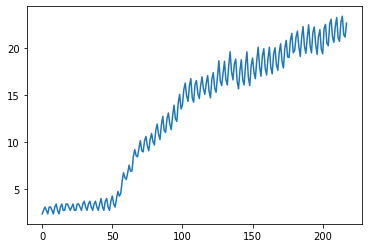

In [6]:
transformed_gas = boxcox(aus_production.Gas, lmbda=lambda_)
plt.plot(range(0, len(transformed_gas)), transformed_gas)
# and the variance in the series is not stable as a result...

## Time series components

In [7]:
us_employment.head()

,Month,Series_ID,Title,Employed
0,1939 Jan,CEU0500000001,Total Private,25338.0
1,1939 Feb,CEU0500000001,Total Private,25447.0
2,1939 Mar,CEU0500000001,Total Private,25833.0
3,1939 Apr,CEU0500000001,Total Private,25801.0
4,1939 May,CEU0500000001,Total Private,26113.0


In [8]:
us_retail_employment = us_employment[
    (us_employment.Month.str[:4].astype(int) >= 1990) & (us_employment.Title == 'Retail Trade')
].drop(
    columns='Series_ID'
).assign(
    Month_dt = pd.to_datetime(us_employment.Month.str.replace(' ', '-'))
)
us_retail_employment.head()

,Month,Title,Employed,Month_dt
50031,1990 Jan,Retail Trade,13255.8,1990-01-01
50032,1990 Feb,Retail Trade,12966.3,1990-02-01
50033,1990 Mar,Retail Trade,12938.2,1990-03-01
50034,1990 Apr,Retail Trade,13012.3,1990-04-01
50035,1990 May,Retail Trade,13108.3,1990-05-01


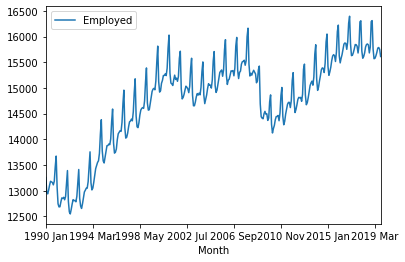

In [9]:
us_retail_employment.plot(x='Month', y='Employed')

In [44]:
from statsmodels.tsa.seasonal import STL

ts = us_retail_employment.set_index('Month').Employed
stl = STL(ts, seasonal=13, period=12)
dcmp = stl.fit()
components = get_components(dcmp)

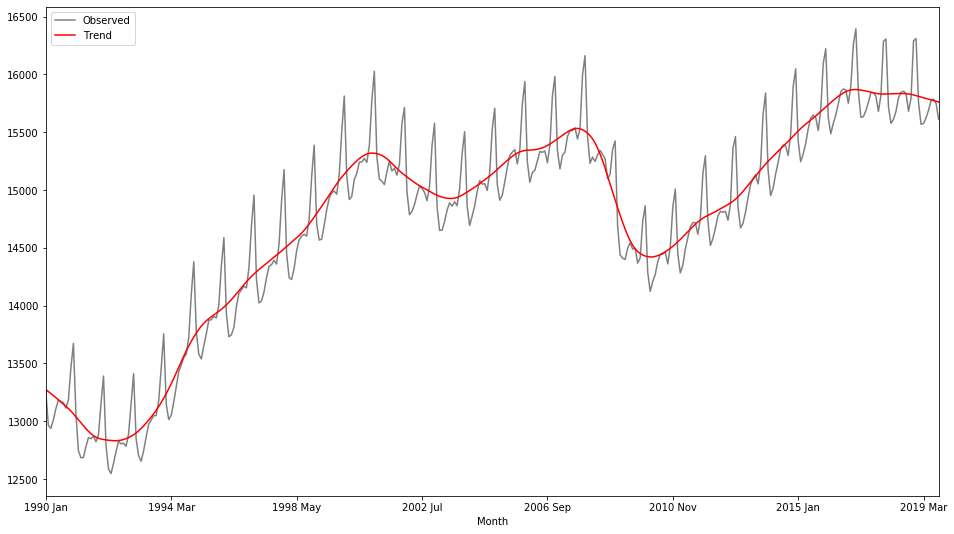

In [56]:
us_retail_employment.plot(x='Month', y='Employed', label='Observed', color='gray')
plt.plot(components.index, components.trend, label='Trend', color='red')
plt.legend()

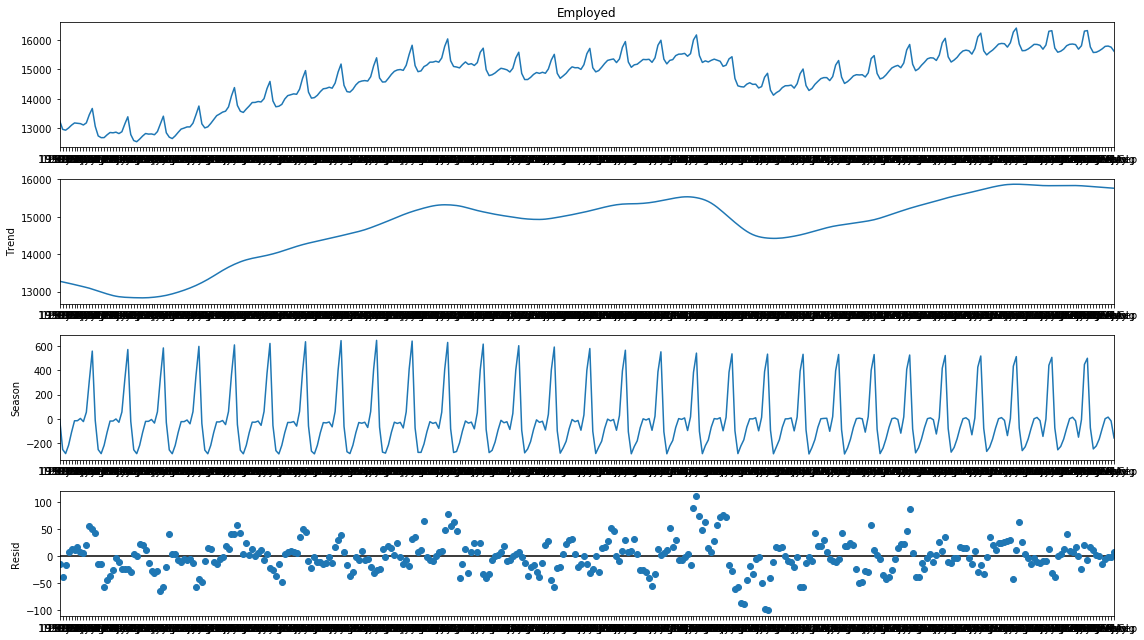

In [54]:
fig = dcmp.plot()

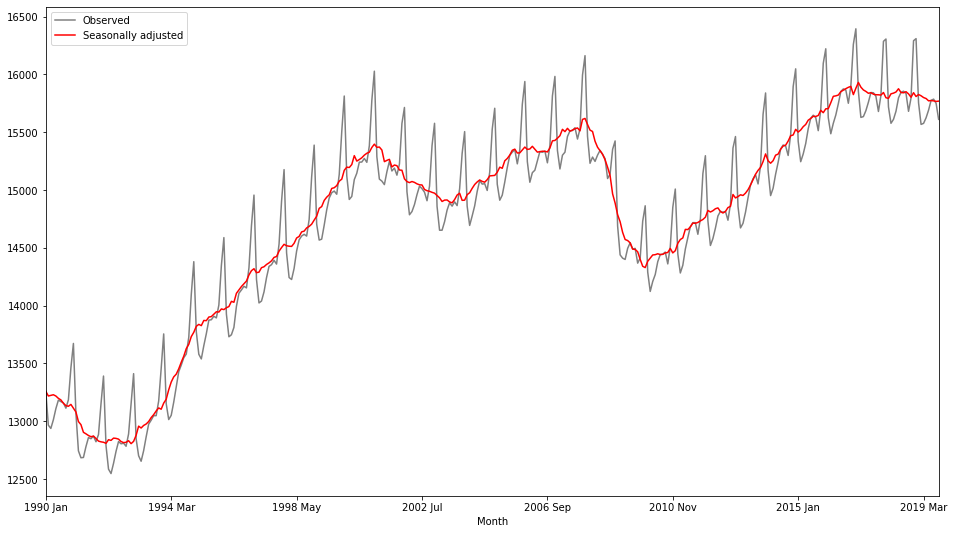

In [55]:
us_retail_employment.plot(x='Month', y='Employed', color='gray', label='Observed')
plt.plot(components.index, components.trend + components.resid, color='red', label='Seasonally adjusted')
plt.legend()

## Moving averages

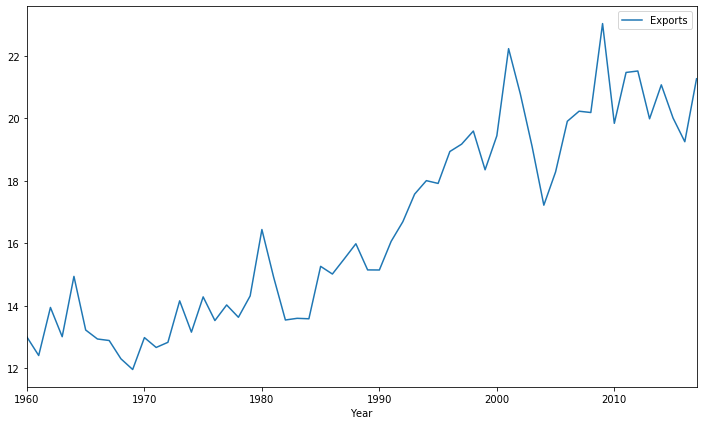

In [61]:
global_economy.query(
    'Country == "Australia"'
).plot(x='Year', y='Exports')

In [71]:
global_economy.loc[:, 'Exports']

0         4.132233
1         4.453443
2         4.878051
3         9.171601
4         8.888893
           ...    
15145    21.987759
15146    20.930146
15147    19.160176
15148    19.943532
15149    19.658023
Name: Exports, Length: 15150, dtype: float64

In [80]:
aus_exports = global_economy.query('Country == "Australia"')
aus_exports['5-MA'] = aus_exports['Exports'].rolling(window=5, center=True).mean()
aus_exports.head(10)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,5-MA
638,Australia,AUS,1960,1.857319e+10,NaN,7.960458,14.061746,12.994452,10276477.0,NaN
639,Australia,AUS,1961,1.964834e+10,2.485605,8.142560,15.025080,12.403101,10483000.0,NaN
640,Australia,AUS,1962,1.988801e+10,1.296478,8.116545,12.630927,13.943012,10742000.0,13.456940
641,Australia,AUS,1963,2.150185e+10,6.214278,8.168574,13.834054,13.005886,10950000.0,13.502085
642,Australia,AUS,1964,2.375854e+10,6.978724,8.402706,13.764495,14.938248,11167000.0,13.607941
643,Australia,AUS,1965,2.593124e+10,5.983450,8.688866,15.267340,13.220178,11388000.0,13.396084
644,Australia,AUS,1966,2.726173e+10,2.382491,8.975026,15.130228,12.932380,11651000.0,13.254441
645,Australia,AUS,1967,3.038974e+10,6.302386,9.287201,13.893495,12.883730,11799000.0,12.657763
646,Australia,AUS,1968,3.265763e+10,5.095868,9.521332,14.485597,12.297668,12009000.0,12.609135
647,Australia,AUS,1969,3.662000e+10,7.044159,9.833507,13.334149,11.954860,12263000.0,12.554914


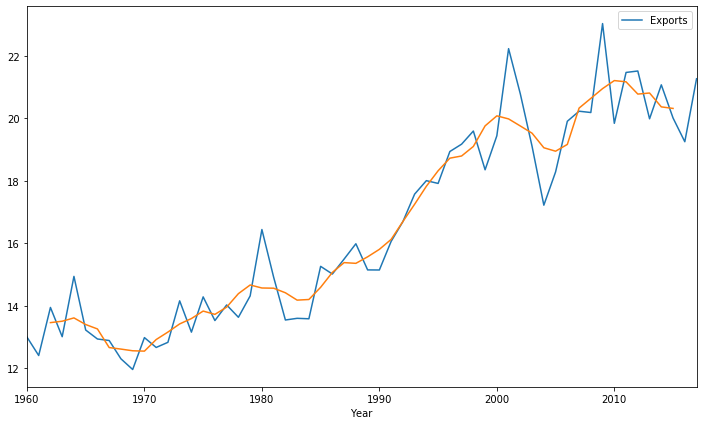

In [83]:
aus_exports.plot(x='Year', y='Exports')
plt.plot(aus_exports['Year'], aus_exports['5-MA'])

In [104]:
def make_rolling(df, var, order):
    new_var = str(order) + '-MA'
    df[new_var] = df[var].rolling(window=order, center=True).mean()
    return df

for i in [3, 5, 7, 9]:
    make_rolling(aus_exports, 'Exports', i)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
aus_exports.head(10)

,Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,5-MA,3-MA,7-MA,9-MA
638,Australia,AUS,1960,1.857319e+10,NaN,7.960458,14.061746,12.994452,10276477.0,NaN,NaN,NaN,NaN
639,Australia,AUS,1961,1.964834e+10,2.485605,8.142560,15.025080,12.403101,10483000.0,NaN,13.113522,NaN,NaN
640,Australia,AUS,1962,1.988801e+10,1.296478,8.116545,12.630927,13.943012,10742000.0,13.456940,13.117333,NaN,NaN
641,Australia,AUS,1963,2.150185e+10,6.214278,8.168574,13.834054,13.005886,10950000.0,13.502085,13.962382,13.348180,NaN
642,Australia,AUS,1964,2.375854e+10,6.978724,8.402706,13.764495,14.938248,11167000.0,13.607941,13.721437,13.332362,13.179851
643,Australia,AUS,1965,2.593124e+10,5.983450,8.688866,15.267340,13.220178,11388000.0,13.396084,13.696936,13.317300,13.064340
644,Australia,AUS,1966,2.726173e+10,2.382491,8.975026,15.130228,12.932380,11651000.0,13.254441,13.012096,13.033278,13.128111
645,Australia,AUS,1967,3.038974e+10,6.302386,9.287201,13.893495,12.883730,11799000.0,12.657763,12.704593,13.029157,12.985696
646,Australia,AUS,1968,3.265763e+10,5.095868,9.521332,14.485597,12.297668,12009000.0,12.609135,12.378752,12.703875,12.965682
647,Australia,AUS,1969,3.662000e+10,7.044159,9.833507,13.334149,11.954860,12263000.0,12.554914,12.409855,12.647530,12.878656


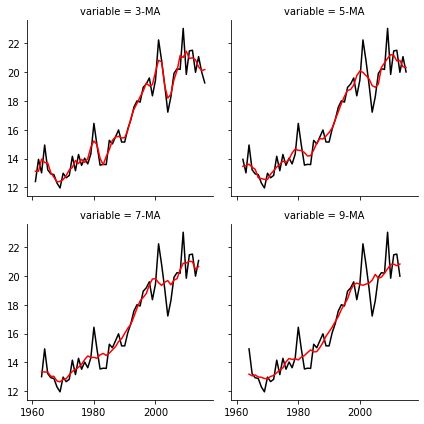

In [121]:
aus_long = aus_exports[['Year', 'Exports', '3-MA', '5-MA', '7-MA', '9-MA']].melt(
    id_vars=['Year', 'Exports']
)

p = sns.FacetGrid(aus_long, col='variable', col_wrap=2)
p.map_dataframe(sns.lineplot, x='Year', y='Exports', ci=None, color='black')
p.map_dataframe(sns.lineplot, x='Year', y='value', ci=None, color='red')

In [122]:
aus_production.head()

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956 Q1,284,5225.0,189.0,465,3923,5
1,1956 Q2,213,5178.0,204.0,532,4436,6
2,1956 Q3,227,5297.0,208.0,561,4806,7
3,1956 Q4,308,5681.0,197.0,570,4418,6
4,1957 Q1,262,5577.0,187.0,529,4339,5


In [148]:
beer = aus_production[aus_production.Quarter.str[:4].astype('int') >= 1992][['Quarter', 'Beer']]
beer.head()

,Quarter,Beer
144,1992 Q1,443
145,1992 Q2,410
146,1992 Q3,420
147,1992 Q4,532
148,1993 Q1,433


In [149]:
beer_ma = beer.assign(
    MA_4 = lambda x: x.Beer.rolling(window=4, center=True).mean().shift(-1),
    MA_2x4 = lambda x: x.MA_4.rolling(window=2, center=True).mean()
)

beer_ma.head()

,Quarter,Beer,MA_4,MA_2x4
144,1992 Q1,443,NaN,NaN
145,1992 Q2,410,451.25,NaN
146,1992 Q3,420,448.75,450.000
147,1992 Q4,532,451.50,450.125
148,1993 Q1,433,449.00,450.250


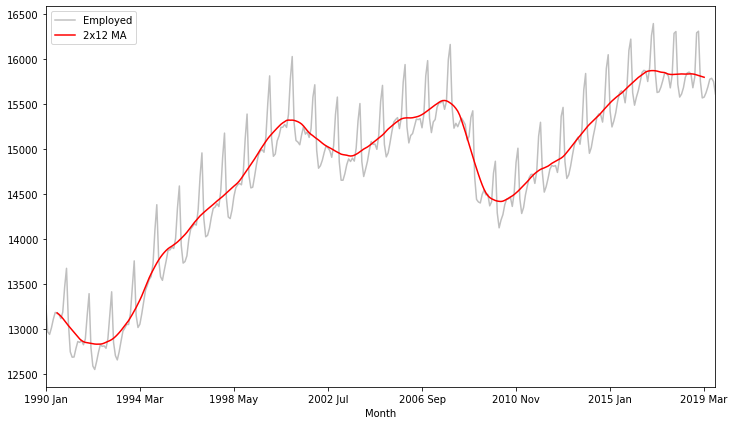

In [155]:
us_retail_employment_ma = us_retail_employment.assign(
    MA_12 = lambda x: x.Employed.rolling(window=12, center=True).mean().shift(-1),
    MA_2x12 = lambda x: x.MA_12.rolling(window=2, center=True).mean()
)


us_retail_employment.plot(x='Month', y='Employed', color='gray', alpha=.5, label='Employed')
plt.plot('Month', 'MA_2x12', data=us_retail_employment_ma, color='red', label='2x12 MA')
plt.legend()

## Classical decomposition

In [168]:
us_retail_employment.head()

,Month,Title,Employed,Month_dt
50031,1990 Jan,Retail Trade,13255.8,1990-01-01
50032,1990 Feb,Retail Trade,12966.3,1990-02-01
50033,1990 Mar,Retail Trade,12938.2,1990-03-01
50034,1990 Apr,Retail Trade,13012.3,1990-04-01
50035,1990 May,Retail Trade,13108.3,1990-05-01


In [176]:
from statsmodels.tsa.seasonal import seasonal_decompose

seas_decomp = seasonal_decompose(us_retail_employment.Employed, freq=12, model='additive') # monthly data
components = get_components(seas_decomp)
components.head(12)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


,observed,resid,seasonal,trend
50031,13255.8,NaN,-75.461230,NaN
50032,12966.3,NaN,-273.051173,NaN
50033,12938.2,NaN,-253.195856,NaN
50034,13012.3,NaN,-190.219599,NaN
50035,13108.3,NaN,-88.923022,NaN
50036,13182.8,NaN,-10.388349,NaN
50037,13170.1,5.649161,-13.311661,13177.762500
50038,13159.5,8.796862,-9.992696,13160.695833
50039,13113.4,59.908500,-87.379333,13140.870833
50040,13185.2,33.819420,34.634747,13116.745833


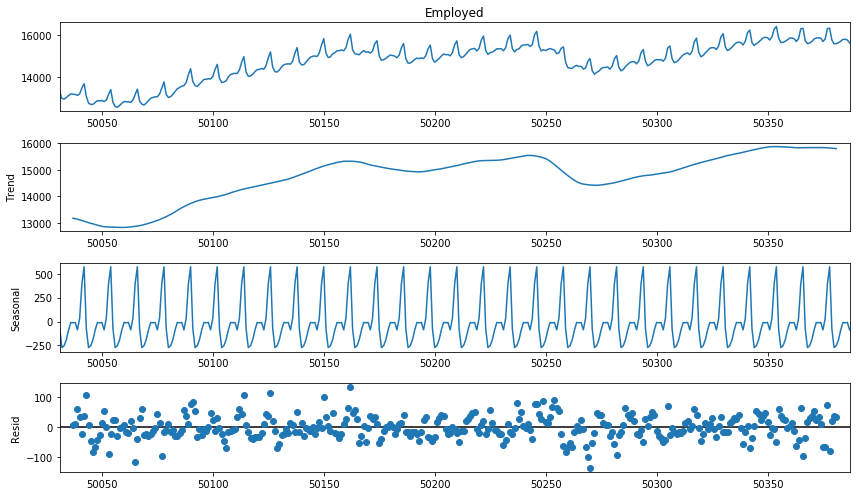

In [180]:
fig = seas_decomp.plot()

## X11 and SEATS decomposition

Neither seem to exist in statsmodels??

## STL decomposition

In [181]:
us_retail_employment.head()

,Month,Title,Employed,Month_dt
50031,1990 Jan,Retail Trade,13255.8,1990-01-01
50032,1990 Feb,Retail Trade,12966.3,1990-02-01
50033,1990 Mar,Retail Trade,12938.2,1990-03-01
50034,1990 Apr,Retail Trade,13012.3,1990-04-01
50035,1990 May,Retail Trade,13108.3,1990-05-01


In [206]:
from statsmodels.tsa.seasonal import STL

ts = us_retail_employment.set_index('Month').Employed
stl = STL(ts, seasonal=13, period=12)
dcmp = stl.fit()
components = get_components(dcmp)

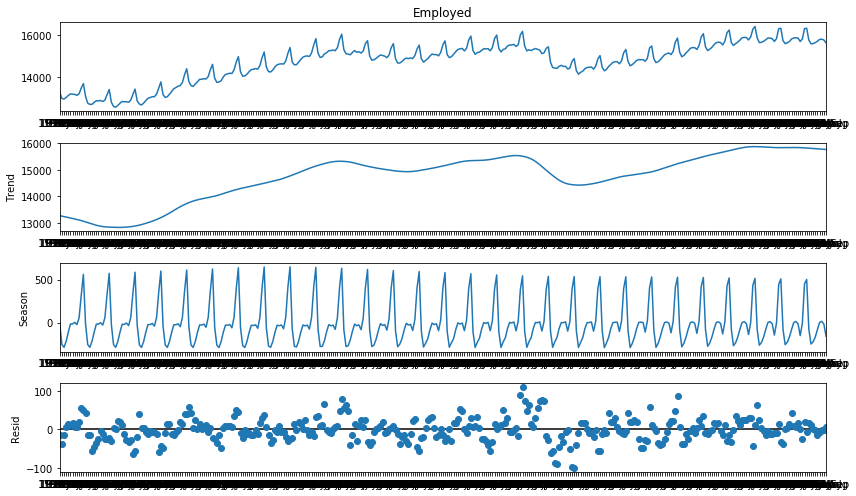

In [208]:
fig = dcmp.plot()